Iteration 1, loss = 6.20939316
Iteration 2, loss = 6.19155426
Iteration 3, loss = 6.17727867
Iteration 4, loss = 6.16299287
Iteration 5, loss = 6.14776699
Iteration 6, loss = 6.13105082
Iteration 7, loss = 6.11175672
Iteration 8, loss = 6.08941558
Iteration 9, loss = 6.06347621
Iteration 10, loss = 6.03363985
Iteration 11, loss = 5.99823226
Iteration 12, loss = 5.95798222
Iteration 13, loss = 5.91254907
Iteration 14, loss = 5.86196983
Iteration 15, loss = 5.80627831
Iteration 16, loss = 5.74544182
Iteration 17, loss = 5.68048490
Iteration 18, loss = 5.61322427
Iteration 19, loss = 5.54644199
Iteration 20, loss = 5.48161355
Iteration 21, loss = 5.41641301
Iteration 22, loss = 5.35245982
Iteration 23, loss = 5.29018497
Iteration 24, loss = 5.22641882
Iteration 25, loss = 5.16265867
Iteration 26, loss = 5.09826981
Iteration 27, loss = 5.03257575
Iteration 28, loss = 4.96601114
Iteration 29, loss = 4.89798325
Iteration 30, loss = 4.82933635
Iteration 31, loss = 4.75840900
Iteration 32, los

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



MLP Model Training Completed.


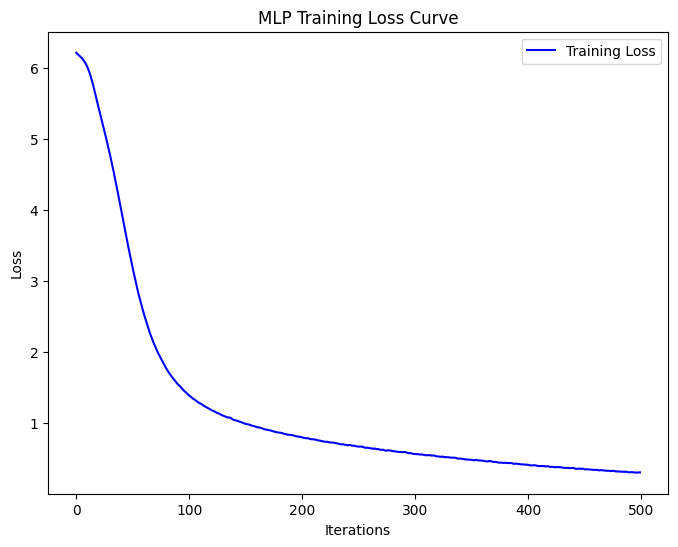


Model Accuracy: 0.01

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
        2000       0.00      0.00      0.00         1
        3000       0.00      0.00      0.00         1
        4000       0.00      0.00      0.00         2
        7000       0.00      0.00      0.00         2
        9000       0.00      0.00      0.00         1
       10000       0.00      0.00      0.00         1
       11000       0.00      0.00      0.00         1
       13000       0.00      0.00      0.00         1
       15000       0.00      0.00      0.00         2
       17000       0.00      0.00      0.00         0
       18000       0.00      0.00      0.00         1
       20000       0.00      0.00      0.00         3
       22000       0.00      0.00      0.00         1
       24000       0.00      0.00      0.00         1
       25000       0.00      0.00      0.00         1
       27000       0.00      0.00 

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMet

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (Replace 'Dataset.csv' with your actual dataset file path)
df = pd.read_csv("Dataset.csv")

# Step 1: Encode Categorical Variables
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Step 2: Define Features (X) and Target Variable (y)
X = df.drop(columns=["Annual Income"])  # Independent variables
y = df["Annual Income"]  # Target variable (Classification)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Build and Train MLP Model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42, verbose=True)

# Train the model
mlp.fit(X_train, y_train)

print("\nMLP Model Training Completed.")

# Step 6: Plot Training Loss Curve
plt.figure(figsize=(8,6))
plt.plot(mlp.loss_curve_, label="Training Loss", color='blue')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("MLP Training Loss Curve")
plt.legend()
plt.show()

# Step 7: Model Evaluation
y_pred = mlp.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
